## 2. An√°lise explorat√≥ria dos dados

### 2.1 Vis√£o geral dos dados

In [ ]:
# Informa√ß√µes gerais do DataFrame
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                10000 non-null  datetime64[ns]
 1   Descri√ß√£o           10000 non-null  object        
 2   Cor                 10000 non-null  object        
 3   Quantidade          10000 non-null  int32         
 4   Valor               10000 non-null  float64       
 5   Situa√ß√£o            10000 non-null  object        
 6   Cliente_ID          10000 non-null  int32         
 7   Regi√£o              10000 non-null  object        
 8   Canal_Venda         10000 non-null  object        
 9   Desconto            10000 non-null  int32         
 10  Campanha_Marketing  10000 non-null  object        
 11  Categoria_Produto   10000 non-null  object        
 12  Valor_Final         10000 non-null  float64       
 13  Ticket_Medio        10000 non-null  float6

In [ ]:
# Estat√≠sticas descritivas
df_vendas.describe()

Data    Quantidade         Valor    Cliente_ID  \
count                       10000  10000.000000  10000.000000  10000.000000   
mean   2025-07-01 12:00:08.640000      4.988600     50.201700   1049.171700   
min           2025-01-01 00:00:00      1.000000      1.000000   1000.000000   
25%           2025-04-01 18:00:00      3.000000     26.000000   1024.000000   
50%           2025-07-01 12:00:00      5.000000     50.000000   1049.000000   
75%           2025-09-30 06:00:00      7.000000     75.000000   1075.000000   
max           2025-12-31 00:00:00      9.000000     99.000000   1099.000000   
std                           NaN      2.576962     28.394955     29.071129   

           Desconto   Valor_Final  Ticket_Medio  
count  10000.000000  10000.000000  10000.000000  
mean       7.510500    231.656215    231.656283  
min        0.000000      0.850000    190.400000  
25%        5.000000     75.050000    218.960000  
50%        5.000000    175.950000    231.730000  
75%       15.000000    345.100000    242.550000  
max       15.000000    891.000000    277.320000  
std        5.597591    192.717782     16.764245

In [ ]:
# Valores faltantes por coluna
df_vendas.isnull().sum()

Data                  0
Descri√ß√£o             0
Cor                   0
Quantidade            0
Valor                 0
Situa√ß√£o              0
Cliente_ID            0
Regi√£o                0
Canal_Venda           0
Desconto              0
Campanha_Marketing    0
Categoria_Produto     0
Valor_Final           0
Ticket_Medio          0
dtype: int64

In [ ]:
# Contagem de valores unicos
df_vendas.select_dtypes(include=object).nunique()

Descri√ß√£o             7
Cor                   5
Situa√ß√£o              2
Regi√£o                6
Canal_Venda           2
Campanha_Marketing    3
Categoria_Produto     3
dtype: int64

### 2.2 Distribui√ß√µes e histogramas

In [ ]:
# Verificando simetria e distribui√ß√£o de valores

# Calculos para Valor Final
media_vf = df_vendas["Valor_Final"].mean()
mediana_vf = df_vendas["Valor_Final"].median()
std_vf = df_vendas["Valor_Final"].std()

# Calculos para Ticket Medio para Clientes
ticket_medio = df_vendas.groupby("Cliente_ID")["Valor_Final"].mean().reset_index()
media_tm = ticket_medio["Valor_Final"].mean()
mediana_tm = ticket_medio["Valor_Final"].median()
std_tm = ticket_medio["Valor_Final"].std()
Q1 = df_vendas["Ticket_Medio"].quantile(0.25)
Q3 = df_vendas["Ticket_Medio"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 -1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

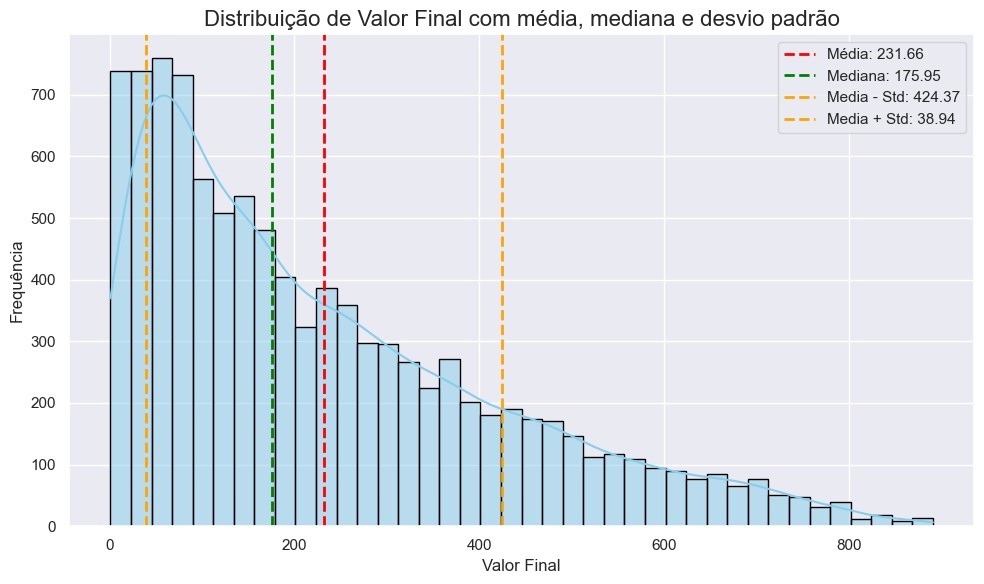

In [ ]:
# Histograma Valor Final
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_vendas["Valor_Final"], bins=40, kde=True, color='skyblue', edgecolor="black")
plt.axvline(media_vf, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {media_vf:.2f}')
plt.axvline(mediana_vf, color="green", linestyle="--", linewidth=2, label=f"Mediana: {mediana_vf:.2f}")
plt.axvline(media_vf + std_vf, color="orange", linestyle="--", linewidth=2, label=f"Media - Std: {media_vf+std_vf:.2f}")
plt.axvline(media_vf - std_vf, color="orange", linestyle="--", linewidth=2, label=f"Media + Std: {media_vf-std_vf:.2f}")
plt.title("Distribui√ß√£o de Valor Final com m√©dia, mediana e desvio padr√£o", fontsize=16)
plt.xlabel("Valor Final")
plt.ylabel("Frequ√™ncia")
plt.legend()
plt.tight_layout()
plt.show()

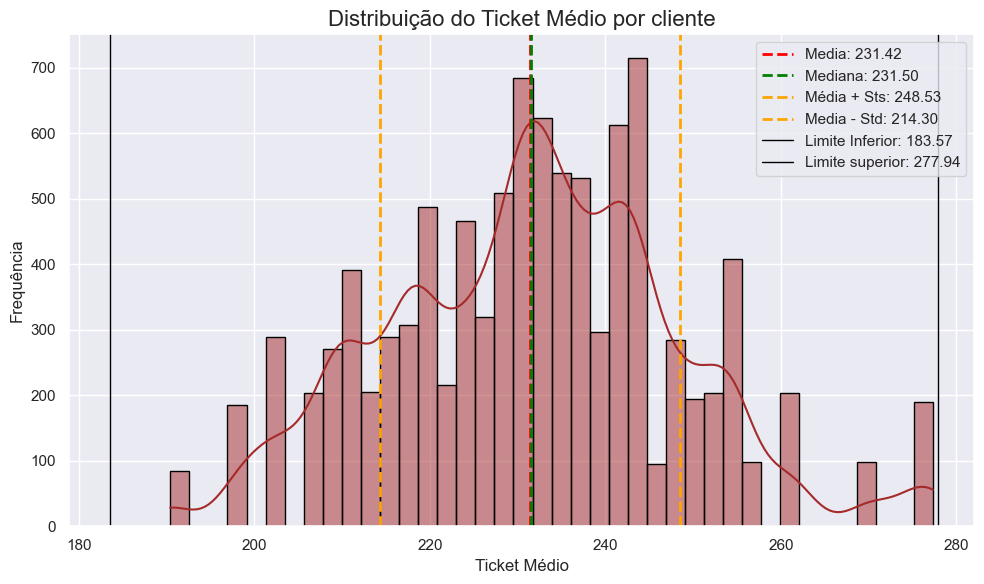

In [ ]:
# Histograma Ticket Medio
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.histplot(df_vendas["Ticket_Medio"], bins=40, kde=True, color="brown", edgecolor="black")
plt.axvline(media_tm, color="red", linestyle="--", linewidth=2, label=f"Media: {media_tm:.2f}")
plt.axvline(mediana_tm, color="green", linestyle="--", linewidth=2, label=f"Mediana: {mediana_tm:.2f}")
plt.axvline(media_tm + std_tm, color="orange", linestyle="--", linewidth=2, label=f"M√©dia + Sts: {media_tm+std_tm:.2f}")
plt.axvline(media_tm - std_tm, color="orange", linestyle="--", linewidth=2, label=f"Media - Std: {media_tm - std_tm:.2f}")
plt.axvline(limite_inferior, color="black", linestyle="-", linewidth=1, label=f"Limite Inferior: {limite_inferior:.2f}")
plt.axvline(limite_superior, color="black", linestyle="-", linewidth=1, label=f"Limite superior: {limite_superior:.2f}")
plt.title("Distribui√ß√£o do Ticket M√©dio por cliente", fontsize=16)
plt.xlabel("Ticket M√©dio")
plt.ylabel("Frequ√™ncia")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Detec√ß√£o de outliers com m√©todo IQR

# Calcular os quartis
Q1 = df_vendas["Ticket_Medio"].quantile(0.25)
Q3 = df_vendas["Ticket_Medio"].quantile(0.75)

# Calculando o intervalo entre quartis
IQR = Q3 - Q1

# Definindo os limites para identificar outliers
limite_inferior = Q1 -1.5 * IQR #(Valores abaixo s√£o outliers)
limite_superior = Q3 + 1.5 * IQR #(Valores acima s√£o outliers)

# Filtra os outliers
outliers_iqr = df_vendas[(df_vendas["Ticket_Medio"] < limite_inferior) | (df_vendas["Ticket_Medio"] > limite_superior) ]

# Resultados
print(f"N√∫mero de outliers pelo m√©todo IQR: {outliers_iqr.shape[0]}")
print(f"Limite inferior: {limite_inferior} , Limite superior: {limite_superior}")

N√∫mero de outliers pelo m√©todo IQR: 0
Limite inferior: 183.575 , Limite superior: 277.935


In [ ]:
# Detec√ß√£o de outliers com o m√©todo Z-Score

from scipy import stats

# Calculando o Z-Score
z_scores = stats.zscore(df_vendas["Ticket_Medio"])

# Definindo um limite padr√£o (acima ou abaixo de 3 √© consideravel outlier)
limiar = 3

# Identificando os outliers
outliers_z = df_vendas[(z_scores > limiar) | (z_scores < -limiar)]

# Quantidade de outliers encontrados
print(f"N√∫mero de outliers pelo Z-Score: {len(outliers_z)}")

# Visualizando os outliers
display(outliers_z[["Ticket_Medio"]])

N√∫mero de outliers pelo Z-Score: 0


Empty DataFrame
Columns: [Ticket_Medio]
Index: []

### 2.3 ‚Äì S√©ries Temporais e Tend√™ncias

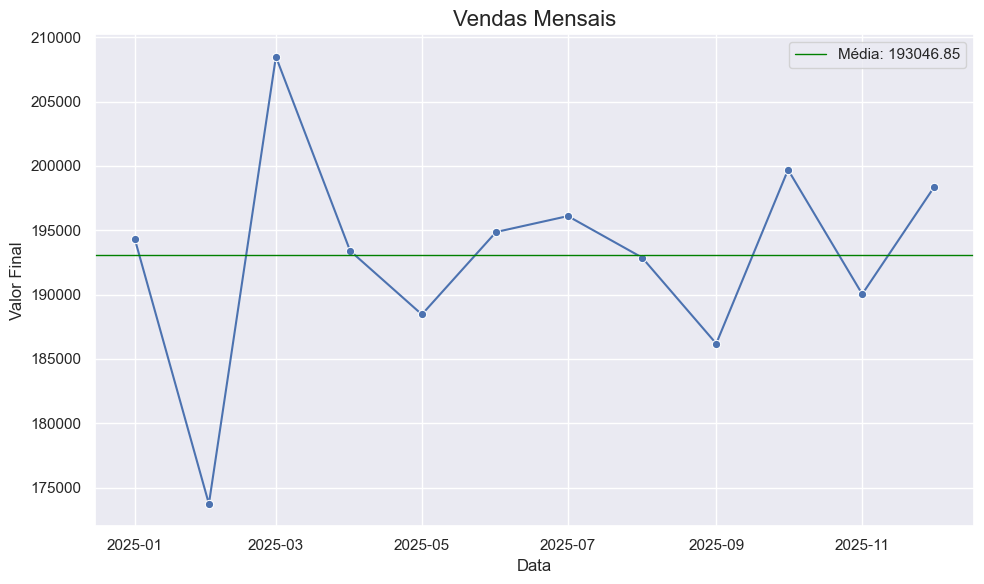

In [ ]:
# Evolu√ß√£o das vendas mensais

# Agrupando venda por m√™s
vendas_mensais = df_vendas.groupby(df_vendas["Data"].dt.to_period("M"))["Valor_Final"].sum().reset_index()
vendas_mensais["Data"] = vendas_mensais["Data"].dt.to_timestamp()
media_mensal = vendas_mensais["Valor_Final"].mean()

# Plotando grafico de linha
plt.figure(figsize=(10,6))
sns.lineplot(data=vendas_mensais, x="Data", y="Valor_Final", marker="o")
plt.axhline(media_mensal, color="green", linestyle="-", linewidth=1, label=f"M√©dia: {media_mensal:.2f}")
plt.title("Vendas Mensais", fontsize=16)
plt.xlabel("Data")
plt.ylabel("Valor Final")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

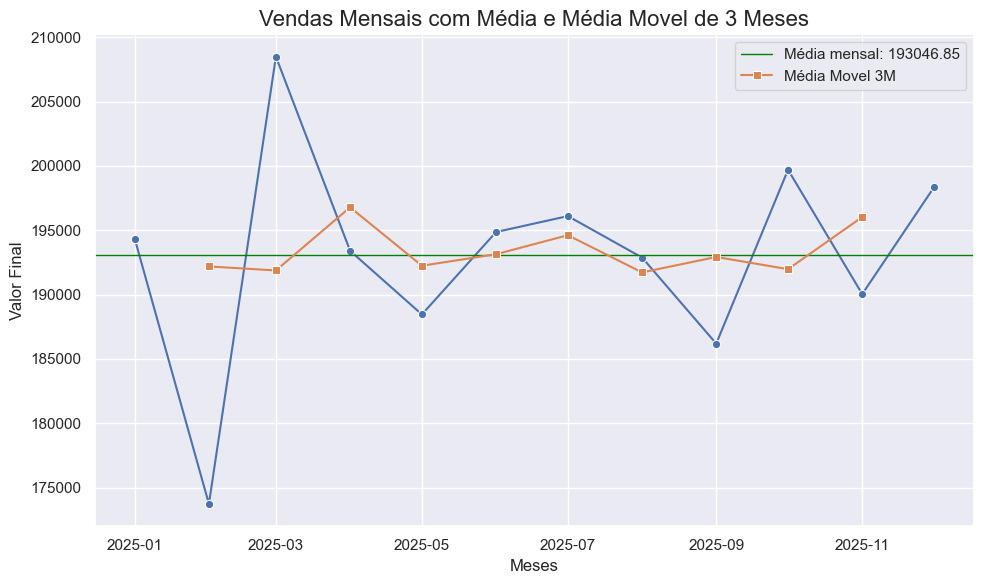

In [ ]:
# Aplicadno uma m√©dia m√≥vel

# M√©dia m√≥vel de 3 meses
vendas_mensais["Media_Movel"]= vendas_mensais["Valor_Final"].rolling(3, center=True).mean()

# Refazendo o grfico
plt.figure(figsize=(10,6))
sns.lineplot(data=vendas_mensais, x="Data", y="Valor_Final", marker="o")
plt.axhline(media_mensal, color="green", linestyle="-", linewidth=1, label=f"M√©dia mensal: {media_mensal:.2f}")
sns.lineplot(data=vendas_mensais, x="Data", y="Media_Movel", marker="s", label="M√©dia Movel 3M")
plt.title("Vendas Mensais com M√©dia e M√©dia Movel de 3 Meses", fontsize=16)
plt.legend()
plt.xlabel("Meses")
plt.ylabel("Valor Final")
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\Ot√°vio Guedes\AppData\Local\Temp\ipykernel_22420\2858076674.py:18: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



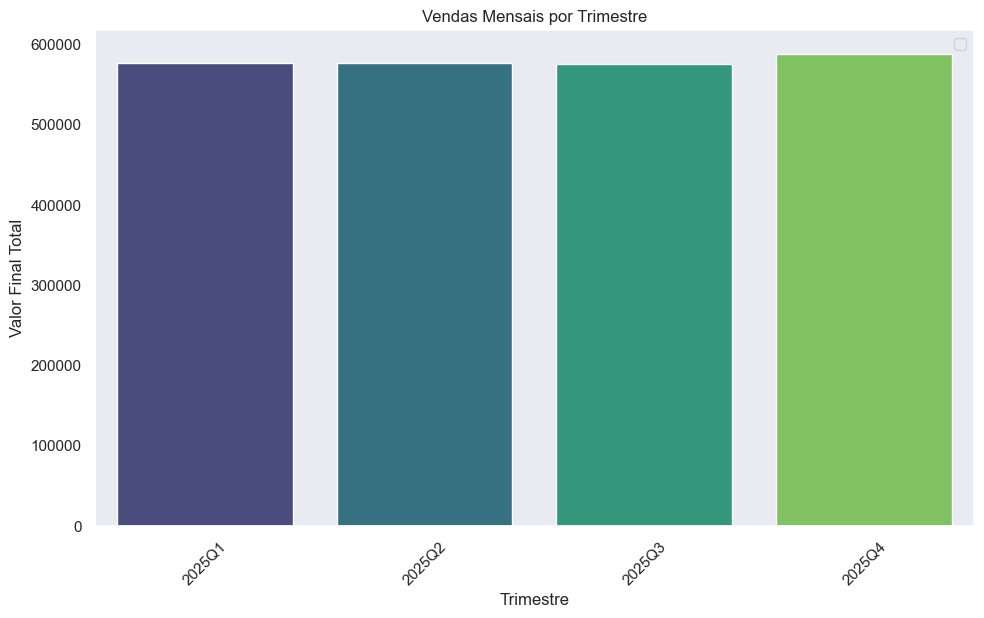

In [ ]:
# Visualizando o gr√°fico por trimestre

# Agrupando com base em trimestre
vendas_mensais["Trimestre"] = vendas_mensais["Data"].dt.to_period("Q").astype(str)
vendas_trimestrais = vendas_mensais.groupby("Trimestre")["Valor_Final"].sum().reset_index()

# Plotando gr√°fico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    data=vendas_trimestrais, 
    x="Trimestre", 
    hue="Trimestre",
    y="Valor_Final", 
    palette="viridis"
)

plt.title("Vendas Mensais por Trimestre")
plt.legend()
plt.xlabel("Trimestre")
plt.ylabel("Valor Final Total")
plt.grid(axis="y")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

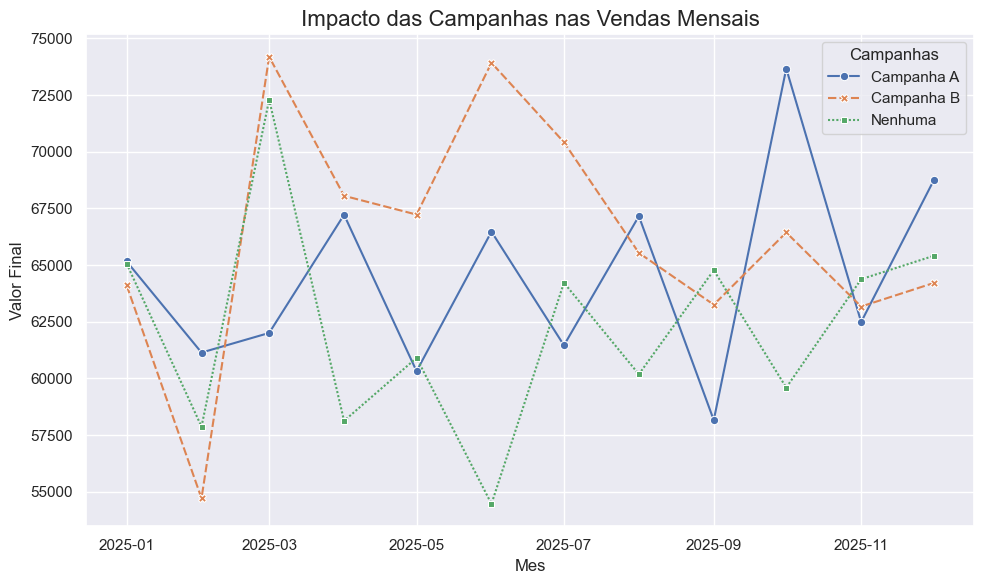

In [ ]:
# Impacto de campanhas por m√™s

# Preparar a coluna Data para meses
df_vendas["Mes"] = df_vendas["Data"].dt.to_period("M").dt.to_timestamp()

campanha_mensal = df_vendas.groupby(["Mes","Campanha_Marketing"])["Valor_Final"].sum().reset_index()

# Transforma as linhas em colunas, colocando cada campanha de marketing em uma √∫nica coluna
campanha_pivot = campanha_mensal.pivot(index="Mes", columns="Campanha_Marketing", values="Valor_Final")

plt.figure(figsize=(10,6))
sns.lineplot(data=campanha_pivot, markers=True)
plt.title("Impacto das Campanhas nas Vendas Mensais", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Valor Final")
plt.legend(title="Campanhas")
plt.tight_layout()
plt.grid(True)


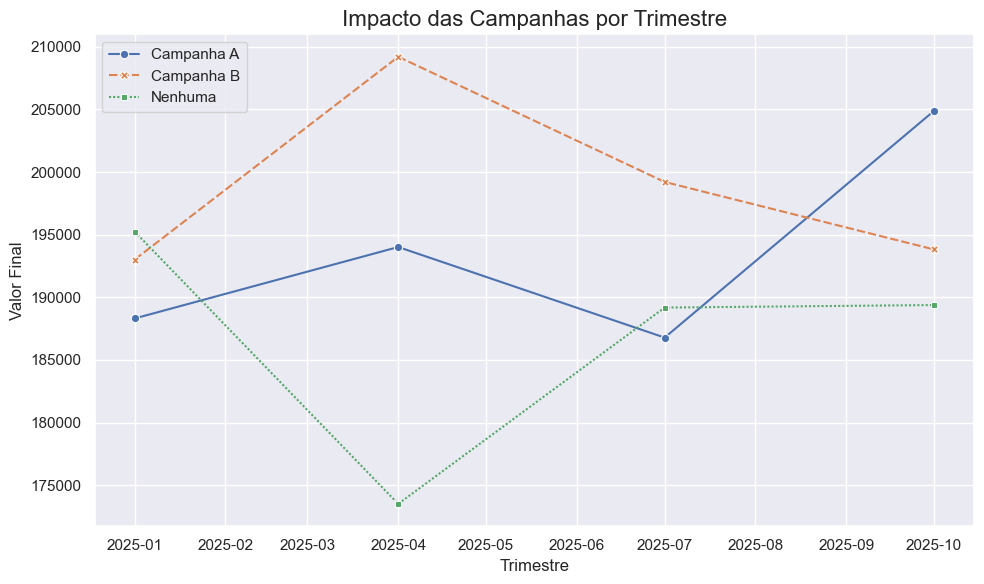

In [ ]:
# Impacto nas campanhas trimestralmente

df_vendas["Trimestre"] = df_vendas["Data"].dt.to_period("Q").dt.to_timestamp()

campanhas_trimestrais = df_vendas.groupby(["Trimestre","Campanha_Marketing"])["Valor_Final"].sum().reset_index()

# Transofrmando as linhas da campanha em coluna
campanhas_trimestrais_pivot = campanhas_trimestrais.pivot(index="Trimestre", columns="Campanha_Marketing", values="Valor_Final")

# Visualizando grafico
plt.figure(figsize=(10,6))
sns.lineplot(data=campanhas_trimestrais_pivot, markers=True)
plt.title("Impacto das Campanhas por Trimestre", fontsize=16)
plt.xlabel("Trimestre")
plt.ylabel("Valor Final")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Resultado da an√°lise

üîπ Vendas Mensais e M√©dia M√≥vel

A m√©dia m√≥vel de 3 meses suavizou as flutua√ß√µes de vendas ao longo do ano, revelando uma tend√™ncia lateral. Apesar de picos em mar√ßo e outubro, o comportamento anual √© est√°vel, com m√©dia mensal pr√≥xima de R$193.000.

üîπ Vendas Trimestrais

Observou-se crescimento gradual ao longo do ano, com destaque para o 4¬∫ trimestre (out‚Äìdez), respons√°vel pelo maior volume de vendas. Esse aumento coincide com a maior presen√ßa da Campanha A nesse per√≠odo.

üîπ An√°lise de Campanhas por M√™s

- **Campanha A**: ganhou for√ßa a partir de agosto, destacando-se especialmente em outubro e dezembro.
- **Campanha B**: teve melhor desempenho entre fevereiro e julho, sendo consistente no 1¬∫ semestre.
- **Sem campanha**: resultou nos piores faturamentos, indicando a import√¢ncia de manter a√ß√µes de marketing ativas.

üîπ Campanhas por Trimestre

A Campanha B dominou o primeiro semestre, mas foi superada pela Campanha A no segundo semestre. A aus√™ncia de campanhas, em qualquer trimestre, resultou em receitas significativamente inferiores.

üìå Insight de neg√≥cio**: Uma estrat√©gia ideal combinaria Campanha B no primeiro semestre e Campanha A no segundo, mantendo a√ß√µes cont√≠nuas para evitar quedas de faturamento.


### 2.4 ‚Äì Agrupamentos por Categoria

In [ ]:
# Agrupando os dados
categoria_produto = df_vendas.groupby("Categoria_Produto")[["Quantidade","Valor_Final"]].sum().reset_index()

# Ticket m√©dio por categoria
ticket_medio = df_vendas.groupby("Categoria_Produto")["Valor_Final"].mean().reset_index().round(2).rename(columns={"Valor_Final":"Ticket_Medio"})

# Merge para unir a Qtd, Valor_Final e Ticket_Medio
categoria_produto = categoria_produto.merge(ticket_medio, on="Categoria_Produto")

# Exibindo DataFrame
display(categoria_produto)


Categoria_Produto  Quantidade  Valor_Final  Ticket_Medio
0        Eletr√¥nico        7159    334773.45        234.27
1        Ferramenta       21177    983610.90        231.87
2          Material       21550    998177.80        230.58

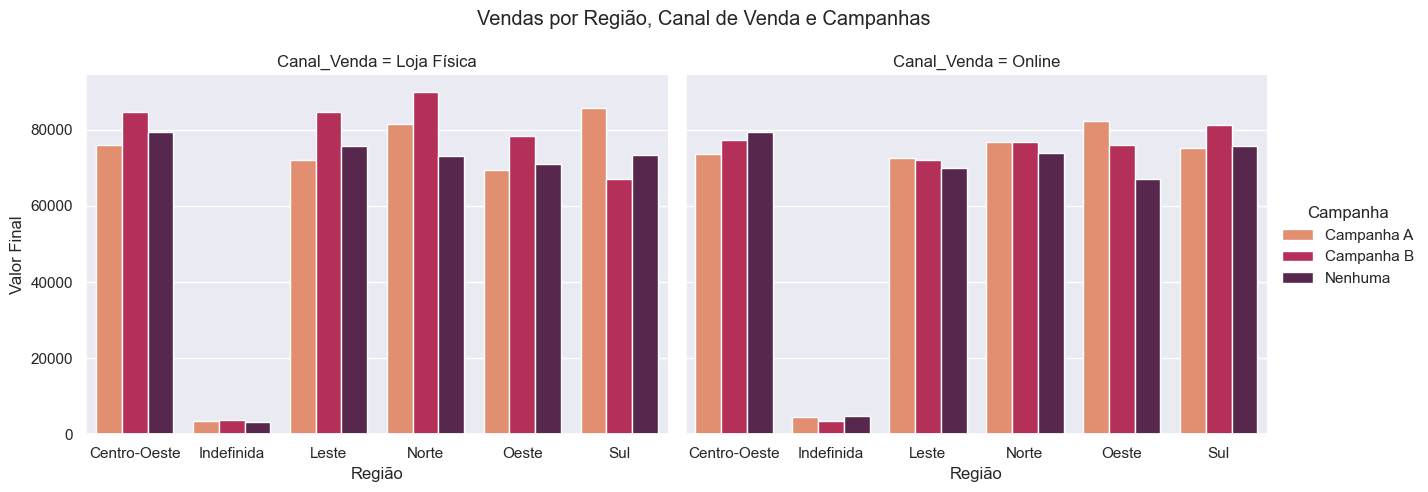

In [ ]:
# Agrupando as campanhas por canal e regi√£o
campanhas_regiao_canal= df_vendas.groupby(["Campanha_Marketing","Regi√£o","Canal_Venda"])["Valor_Final"].sum().reset_index()

# Grafico para visualizar
g = sns.FacetGrid(
    data=campanhas_regiao_canal,
    col="Canal_Venda",
    height=5,
    aspect=1.3
)
g.map_dataframe(
    sns.barplot,
    data=campanhas_regiao_canal,
    x="Regi√£o",
    y="Valor_Final",
    hue="Campanha_Marketing",
    palette="rocket_r"
    
)

g.set_axis_labels("Regi√£o","Valor Final")
g.tight_layout()
g.add_legend(title="Campanha")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Vendas por Regi√£o, Canal de Venda e Campanhas")
plt.show()

Resultado da an√°lise Cruzada: Campanha + Canal de Venda + Regi√£o

Loja F√≠sica

üîπ Observa√ß√£o:
- A **Campanha B** lidera o faturamento em todas as regi√µes, **exceto na Regi√£o Sul**.
- No Sul, a **Campanha A** apresenta desempenho superior.

üîπ Interpreta√ß√£o:
- Campanha B √© bem recebida no canal f√≠sico, possivelmente por abordagem mais direta ou produto mais relevante localmente.
- Campanha A pode estar mais alinhada ao perfil do consumidor do Sul.

üìå Insights de neg√≥cio:
- **Manter Campanha B nas demais regi√µes**
- **Aumentar investimento em Campanha A na Regi√£o Sul**

Loja Online

üîπ Observa√ß√£o:
- **Centro-Oeste** tem melhor desempenho **sem campanha alguma**, o que representa um **preju√≠zo duplo** (faturamento menor + custo da campanha).
- **Leste e Norte** t√™m desempenho mediano com campanhas A e B.
- **Sul** destaca-se com a **Campanha B**, mesmo canalizando vendas online.

üîπ Interpreta√ß√£o:
- Campanhas atuais n√£o est√£o otimizadas para o Centro-Oeste. Pode ser falha na segmenta√ß√£o, abordagem inadequada ou mesmo rejei√ß√£o regional.
- No Sul, Campanha B √© consistente tanto no online quanto no f√≠sico ‚Üí perfil-alvo ideal.

üìå Insights de neg√≥cio:
- **Revisar estrat√©gia de campanha digital no Centro-Oeste**
- **Testar vers√µes regionais das campanhas** para Leste/Norte
- **Manter Campanha B no Sul** (alta ader√™ncia)

Conclus√£o Geral

Campanhas devem ser avaliadas **de forma contextualizada**, considerando canal e regi√£o. Uma mesma campanha pode ter sucesso em uma combina√ß√£o e fracasso em outra. Personalizar estrat√©gias regionais e validar hip√≥teses com testes A/B s√£o pr√°ticas recomendadas para aumento de convers√£o e redu√ß√£o de desperd√≠cio de verba.



In [ ]:
# Agrupamento por canal

canal_venda_agrup = df_vendas.groupby("Canal_Venda")[["Valor_Final","Quantidade"]].sum().reset_index()

canal_venda_agrup["Ticket_Medio"] = (canal_venda_agrup["Valor_Final"] / canal_venda_agrup["Quantidade"]).round(2)

# Exibindo DataFrame
display(canal_venda_agrup)

Canal_Venda  Valor_Final  Quantidade  Ticket_Medio
0  Loja F√≠sica   1172826.85       25228         46.49
1       Online   1143735.30       24658         46.38

In [ ]:
# Agrupamento por situa√ß√£o

situa√ß√£o_agrup = df_vendas.groupby("Situa√ß√£o")[["Quantidade","Valor_Final"]].sum().reset_index()
situa√ß√£o_agrup["Ticket_Medio"] = (situa√ß√£o_agrup["Valor_Final"] / situa√ß√£o_agrup["Quantidade"]).round(2)
situa√ß√£o_agrup["Percentual"] = ((situa√ß√£o_agrup["Valor_Final"] / situa√ß√£o_agrup["Valor_Final"].sum()) * 100).round(2)

# Exibindo DataFrame
display(situa√ß√£o_agrup)

Situa√ß√£o  Quantidade  Valor_Final  Ticket_Medio  Percentual
0  N√£o pago       25562   1181151.75         46.21       50.99
1      Pago       24324   1135410.40         46.68       49.01

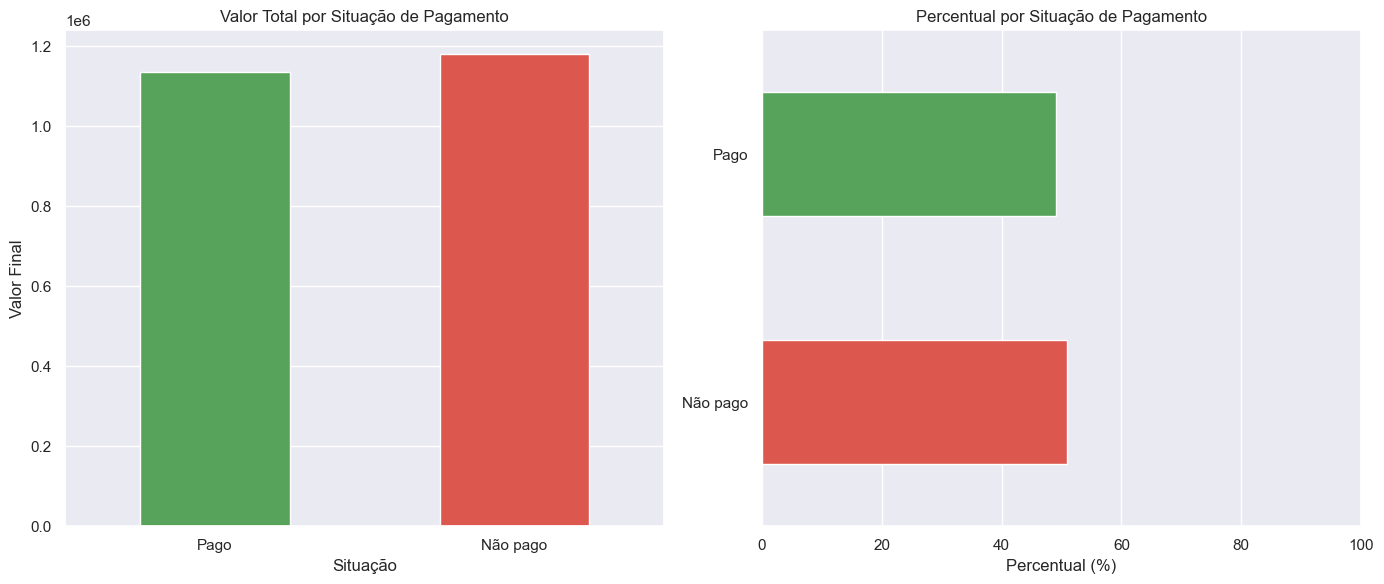

In [ ]:
# Visualizando os resultados

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cores_situacao = {
    "Pago": "#4CAF50",        # Verde
    "N√£o pago": "#F44336"     # Vermelho
}

# Gr√°fico 1 ‚Äì Valor Total por Situa√ß√£o
sns.barplot(
    data=situa√ß√£o_agrup.sort_values("Valor_Final",ascending=True),
    x="Situa√ß√£o",
    y="Valor_Final",
    hue="Situa√ß√£o",
    palette=cores_situacao,
    width=0.5,
    ax=axes[0]
)
axes[0].set_title("Valor Total por Situa√ß√£o de Pagamento")
axes[0].set_ylabel("Valor Final")
axes[0].set_xlabel("Situa√ß√£o")

# Gr√°fico 2 ‚Äì Percentual por Situa√ß√£o
sns.barplot(
    data=situa√ß√£o_agrup.sort_values("Percentual", ascending=True),
    x="Percentual",
    y="Situa√ß√£o",
    hue="Situa√ß√£o",
    palette=cores_situacao,
    width=0.5,
    ax=axes[1]
)
axes[1].set_title("Percentual por Situa√ß√£o de Pagamento")
axes[1].set_xlabel("Percentual (%)")
axes[1].set_ylabel(None)
axes[1].set_xlim(0, 100)

# Ajustar espa√ßamento entre os gr√°ficos
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

plt.show()


Resultado da an√°lise

üîπ Inadimpl√™ncia

Notado um indice de 50,99%.

üìå Insight de neg√≥cio**: Observamos que estamos com um alto volume. Sendo assim podemos estruturar uma equipe de cobran√ßa, mudar a modalidade de pagamentos para cart√£o. Melhorar nossa an√°lise de cr√©dito para vender a prazo.

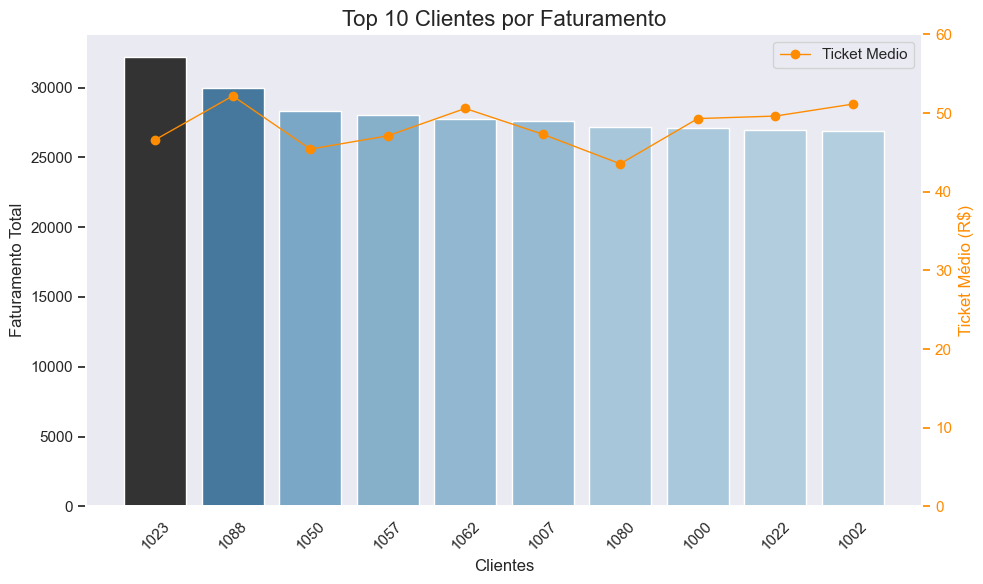

In [ ]:
# Top 10 Clientes com Maior Faturamento
top10_clientes = (
    df_vendas
    .groupby("Cliente_ID")[["Quantidade","Valor_Final"]]
    .agg({
        "Valor_Final":"sum",
        "Quantidade":"sum"
    })
    .rename(
        columns={
            "Quantidade":"Qtd_Total",
            "Valor_Final":"Faturamento_Total"
        }
    )
    .sort_values(by="Faturamento_Total",ascending=False)
    .head(10)
    .reset_index()
)

# Adicionando uma coluna de ticket m√©dio dos top 10 clientes
top10_clientes["Ticket_Medio"] = (top10_clientes["Faturamento_Total"] / top10_clientes["Qtd_Total"]).round(2)

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(
    data=top10_clientes, 
    x="Cliente_ID", 
    y="Faturamento_Total",
    hue="Faturamento_Total",
    palette="Blues_d",
    legend=False,
    ax=ax1,
    order=top10_clientes["Cliente_ID"]
)
ax1.set_title("Top 10 Clientes por Faturamento",fontsize=16)
ax1.set_xlabel("Clientes")
ax1.tick_params(axis="x",rotation=45)
ax1.set_ylabel("Faturamento Total")
ax1.grid(False)

ax2 = ax1.twinx()
x_ticks = ax1.get_xticks()

ax2.plot(
    x_ticks,
    top10_clientes["Ticket_Medio"],
    color="darkorange",
    marker="o",
    linestyle="-",
    linewidth=1,
    label="Ticket Medio",
)

ax2.set_ylabel("Ticket M√©dio (R$)", color="darkorange")
ax2.tick_params(axis="y", colors="darkorange")
ax2.legend(loc="upper right")
ax2.grid(False)
ax2.set_ylim(0,60)

plt.tight_layout()
plt.show()

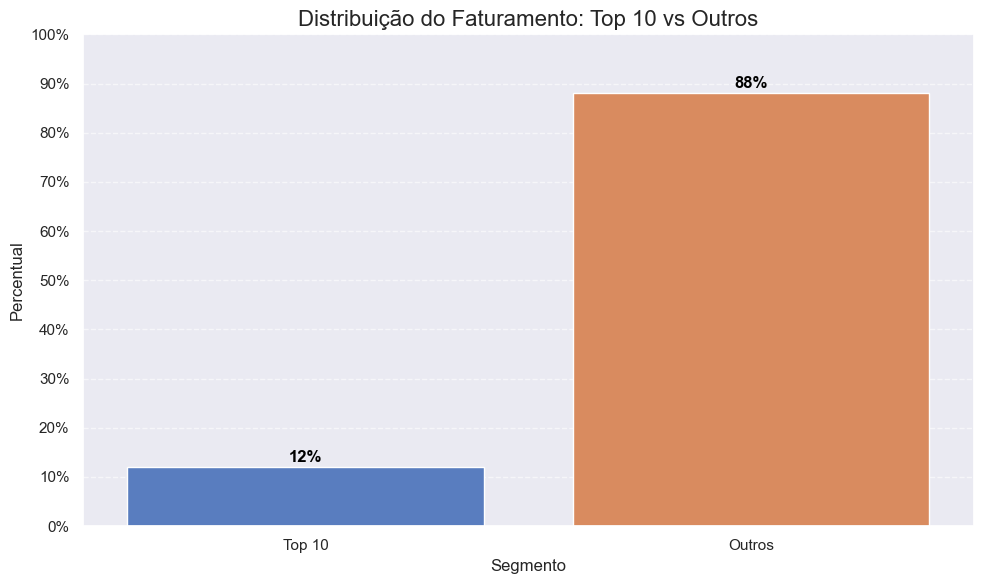

In [ ]:
# Verificando quanto dos 10 clientes representam do faturamento total

fat_top10_clientes = top10_clientes["Faturamento_Total"].sum()
total_faturamento = df_vendas["Valor_Final"].sum()
fat_sem_top10_clientes = total_faturamento - fat_top10_clientes

percentual_top10 = (fat_top10_clientes / total_faturamento).round(2)
percentual_outros = (fat_sem_top10_clientes / total_faturamento).round(2)

pareto = {
    "Segmento":["Top 10","Outros"],
    "Percentual":[percentual_top10,percentual_outros]
}

df_pareto = pd.DataFrame(data=pareto)

# Criando gr√°fico para visualizar
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

ax =(
    sns.barplot(
    data=df_pareto,
    x="Segmento",
    y="Percentual",
    hue="Segmento",
    palette="muted"
))
plt.title("Distribui√ß√£o do Faturamento: Top 10 vs Outros",fontsize=16)
plt.ylabel("Percentual"),
plt.xlabel("Segmento")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.yticks([i/10 for i in range(0,11)])
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adicionando os valores no topo das barras
for i, p in enumerate(ax.patches):
    value = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=value + 0.02,
        s=f"{value:.0%}",
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

plt.tight_layout()
plt.show()

In [ ]:
# Verficando a m√©dia de faturamento

media_top10_clientes = top10_clientes["Faturamento_Total"].mean()
lista_top10 = top10_clientes["Cliente_ID"]
filtro_outros_clientes = ~df_vendas["Valor_Final"].isin(lista_top10)
faturamento_outros = df_vendas[filtro_outros_clientes].groupby("Cliente_ID")["Valor_Final"].sum()
fat_outros_clientes = faturamento_outros.mean().round(2)    


print(f"M√©dia de faturamento total dos top 10: {media_top10_clientes}")
print(f"A m√©dia do faturamento total dos outros √© de:{fat_outros_clientes}")

M√©dia de faturamento total dos top 10: 28197.49
A m√©dia do faturamento total dos outros √© de:23165.62


Resultado da an√°lise

üîπ Top Clientes

A m√©dia de faturamento total dos nossos top 10 est√° em R$ 28.197,49 enquanto nossa m√©dia geral est√° em R$ 23.165,62

üìå Insight de neg√≥cio: Verificamos que temos o nosso top 10 mas eles fazem parte de 12% do todo. Sendo assim caso ocorra churn o impacto √© controlado.

### 2.5 ‚Äì Detec√ß√£o Num√©rica de Outliers

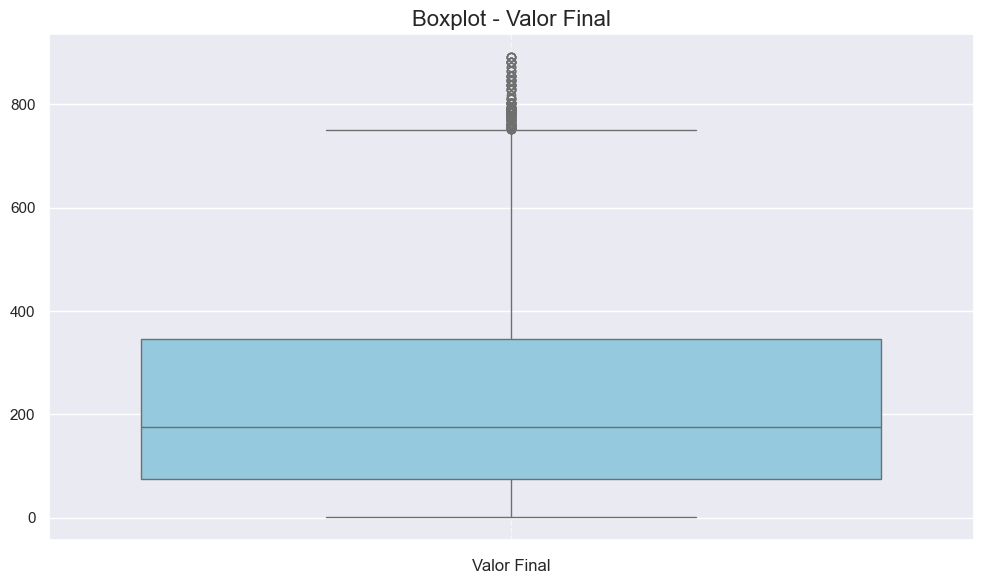

In [ ]:
# Boxplot com IQR

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    df_vendas["Valor_Final"],
    color="skyblue"
)
plt.title("Boxplot - Valor Final", fontsize=16)
plt.xlabel("Valor Final")
plt.ylabel(None)
#plt.yticks([i/10 for i in range(0,1001)])
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Total de outliers detectados: 137
Limite inferior: -330.02
Limite superior: 750.17


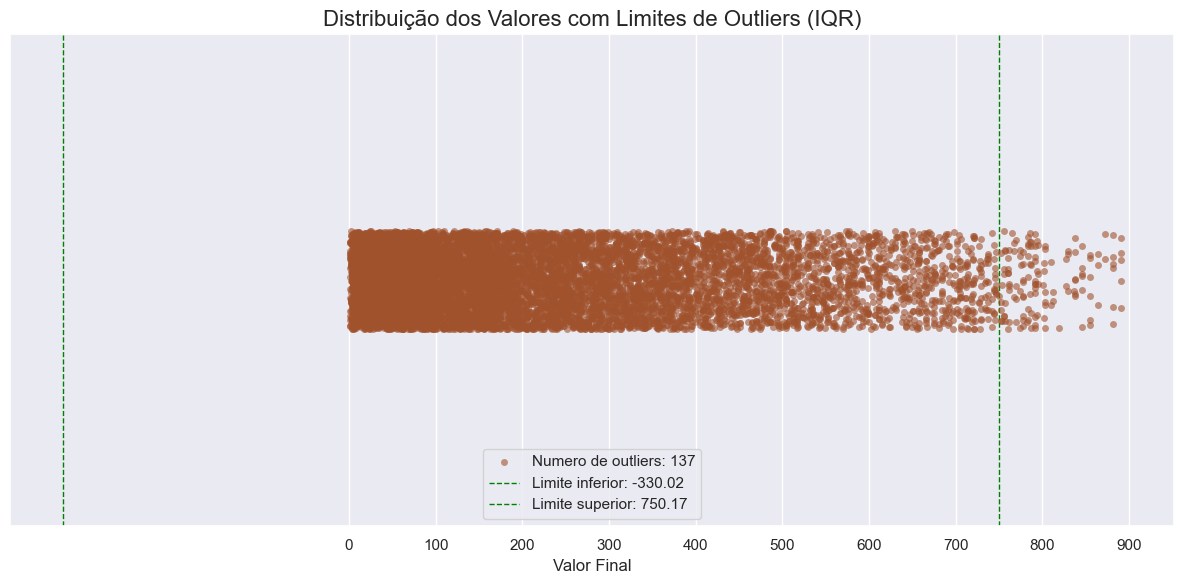

In [ ]:
# C√°lculo do IQR
Q1 = df_vendas["Valor_Final"].quantile(0.25)
Q3 = df_vendas["Valor_Final"].quantile(0.75)
IQR = Q3 - Q1

# Limites corretos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detec√ß√£o de outliers
outliers_iqr = df_vendas[
    (df_vendas["Valor_Final"] < limite_inferior) |
    (df_vendas["Valor_Final"] > limite_superior)
]

print(f"Total de outliers detectados: {outliers_iqr.shape[0]}")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Visuzalindo no grafico

plt.figure(figsize=(12,6))
sns.stripplot(
    data=df_vendas,
    x="Valor_Final",
    color="sienna",
    alpha=0.6,
    jitter=True,
    label=f"Numero de outliers: {outliers_iqr.shape[0]}",
)
plt.title("Distribui√ß√£o dos Valores com Limites de Outliers (IQR)",fontsize=16)
plt.xlabel("Valor Final")
plt.xticks(
    ticks=range(0,int(df_vendas["Valor_Final"].max())+100,100)
)

plt.axvline(limite_inferior, linestyle="--", linewidth=1, color="green", label=f"Limite inferior: {limite_inferior:.2f}")
plt.axvline(limite_superior, linestyle="--", linewidth=1, color="green", label=f"Limite superior: {limite_superior:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# M√©todo Z-Score

# Calculando o Z-Score
df_vendas["Z_Valor_Final"] = zscore(df_vendas["Valor_Final"])

# Identificando os outliers
outliers_zscore = df_vendas[np.abs(df_vendas["Z_Valor_Final"]) > 3]

# Resultados
print(f"N√∫mero de outliers pelo Z-Score: {outliers_zscore.shape[0]}")
print(f"M√©dia: {df_vendas["Valor_Final"].mean():.2f}")
print(f"Desvio padr√£o: {df_vendas["Valor_Final"].std():.2f}")

N√∫mero de outliers pelo Z-Score: 45
M√©dia: 231.66
Desvio padr√£o: 192.72


In [ ]:
# Comparando os dois m√©todos

# IDs das linhas detectadas pelos dois m√©todos
outliers_iqr_ids = set(outliers_iqr.index)
outliers_zscore_ids = set(outliers_zscore.index)

# Interse√ß√£o (comuns aos dois m√©todos)
outliers_em_comum = outliers_iqr_ids.intersection(outliers_zscore_ids)

print(f"Outliers detectados por ambos os m√©todos: {len(outliers_em_comum)}")
print(f"Apenas pelo IQR: {len(outliers_iqr_ids - outliers_em_comum)}")
print(f"Apenas pelo Z-Score: {len(outliers_zscore_ids - outliers_em_comum)}")

Outliers detectados por ambos os m√©todos: 45
Apenas pelo IQR: 92
Apenas pelo Z-Score: 0


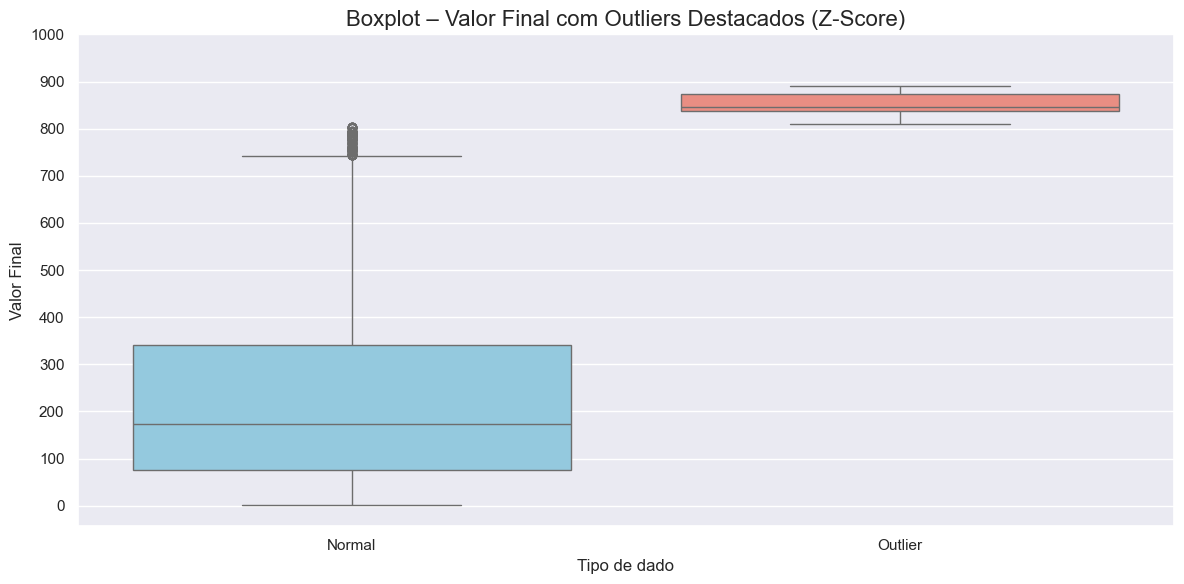

In [ ]:
# Visualizar outliers

# Criando uma categoria para terminar quais s√£o outliers no dataframe
df_vendas["Tipo_ZScore"] = np.where(
    df_vendas["Z_Valor_Final"].abs() > 3, "Outlier", "Normal"
)

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(
    data=df_vendas,
    x="Tipo_ZScore",
    hue="Tipo_ZScore",
    y="Valor_Final",
    palette={
        "Normal": "skyblue",
        "Outlier": "salmon"
    }
)

plt.title("Boxplot ‚Äì Valor Final com Outliers Destacados (Z-Score)",fontsize=16)
plt.xlabel("Tipo de dado")
plt.ylabel("Valor Final")
plt.yticks(
    ticks=range(0, int(df_vendas["Valor_Final"].max() + 200),100)
)

plt.tight_layout()
plt.show()

In [ ]:
# Avalia√ß√£o dos impactos dos outliers

# Sem outliers de Z-Score
sem_outliers = df_vendas[df_vendas["Tipo_ZScore"] == "Normal"]

media_com_outliers = df_vendas["Valor_Final"].mean()
media_sem_outliers = sem_outliers["Valor_Final"].mean()

std_com_outliers = df_vendas["Valor_Final"].std()
std_sem_outliers = sem_outliers["Valor_Final"].std()

print(f"M√©dia com outliers: {media_com_outliers:.2f}")
print(f"M√©dia sem outliers: {media_sem_outliers:.2f}")

print(f"Desvio padr√£o com outliers: {std_com_outliers:.2f}")
print(f"Desvio padr√£o sem outliers: {std_sem_outliers:.2f}")

M√©dia com outliers: 231.66
M√©dia sem outliers: 228.85
Desvio padr√£o com outliers: 192.72
Desvio padr√£o sem outliers: 188.56


Considera√ß√µes sobre o tratamento dos outliers

üîπ Foram identificados 137 outliers com o m√©todo IQR**, dos quais **45 tamb√©m foram detectados pelo Z-Score**.  
üîπ A diferen√ßa entre a m√©dia com e sem outliers foi de apenas **R$ 2,81**, e o desvio padr√£o caiu **R$ 4,16**, indicando **baixo impacto geral**.

üìå Insight de neg√≥cio:  
Os outliers n√£o distorcem significativamente a m√©dia nem a dispers√£o.  
Neste cen√°rio, optamos por manter os dados originais para as an√°lises gerais**, mas marcamos os outliers para poss√≠veis tratamentos futuros, como:
- Exclus√£o pontual para modelos sens√≠veis a extremos  
- Transforma√ß√µes (ex: `log`, `Box-Cox`)  
- Uso de algoritmos robustos a outliers (ex: `RandomForest`, `RANSAC`)
